# (Pred)spracovanie a analýza údajov

## Rozumieť údajom

- predpracovanie je jedna z najdôležitejších častí

- iba keď máte o vašich dátach predstavu, budete ich vedieť správne spracovať a vyhodnotiť 

### 6 fáz:

- Objavovanie (explore)
- Očistenie (clean)
- Úpravy (mutate)
- Popis (describe)
- Vizualizácia (vizualize)
- Analýza (analyze)

In [1]:
# R
# install and load necessary libraries

install.packages("tidyverse")
install.packages("ggplot2")
install.packages("data.table")
install.packages("corrplot")

library(tidyverse)

Installing package into 'C:/Users/akraj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependencies 'colorspace', 'bit', 'farver', 'labeling', 'munsell', 'RColorBrewer', 'viridisLite', 'rematch', 'bit64', 'backports', 'generics', 'blob', 'DBI', 'tidyselect', 'data.table', 'gtable', 'isoband', 'scales', 'gargle', 'cellranger', 'ids', 'timechange', 'vroom', 'tzdb', 'progress', 'selectr', 'broom', 'conflicted', 'dbplyr', 'dplyr', 'dtplyr', 'forcats', 'ggplot2', 'googledrive', 'googlesheets4', 'haven', 'hms', 'lubridate', 'modelr', 'readr', 'readxl', 'reprex', 'rvest', 'tidyr'




package 'colorspace' successfully unpacked and MD5 sums checked
package 'bit' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'viridisLite' successfully unpacked and MD5 sums checked
package 'rematch' successfully unpacked and MD5 sums checked
package 'bit64' successfully unpacked and MD5 sums checked
package 'backports' successfully unpacked and MD5 sums checked
package 'generics' successfully unpacked and MD5 sums checked
package 'blob' successfully unpacked and MD5 sums checked
package 'DBI' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'data.table' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'isoband'

Installing package into 'C:/Users/akraj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\akraj\AppData\Local\Temp\RtmpQxJIMj\downloaded_packages


Installing package into 'C:/Users/akraj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\akraj\AppData\Local\Temp\RtmpQxJIMj\downloaded_packages


Installing package into 'C:/Users/akraj/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\akraj\AppData\Local\Temp\RtmpQxJIMj\downloaded_packages


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Objavovanie (explore)

Budeme používať dataset U.S. Chronic Disease Indicators (CDI), dostupný na:
- https://catalog.data.gov/dataset/u-s-chronic-disease-indicators-cdi

1. načítanie datasetu - aby sme nemuseli dataset manuálne sťahovať, použijeme vstavané funkcie R pre stiahnutie a načítanie súboru

In [2]:
# URL to download the dataset
dataset_url <- "https://data.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD"

# destination file path
dest_file <- "C:/Users/akraj/Desktop/FRIčka/4L/SSBI/cv3/dataset.csv" # TODO - fill in

# download the dataset
download.file(dataset_url, destfile = dest_file)

# read the CSV file into R
data <- read.csv(dest_file)

Warning message in download.file(dataset_url, destfile = dest_file):
"cannot open URL 'https://data.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD': HTTP status was '403 Forbidden'"


ERROR: Error in download.file(dataset_url, destfile = dest_file): cannot open URL 'https://data.cdc.gov/api/views/g4ie-h725/rows.csv?accessType=DOWNLOAD'


In [4]:
# destination file path
dest_file <- "C:/Users/akraj/Desktop/FRIčka/4L/SSBI/cv3/dataset.csv"
# read the CSV file into R
data <- read.csv(dest_file)

Warning message in file(file, "rt"):
"cannot open file 'C:/Users/akraj/Desktop/FRIčka/4L/SSBI/cv3/dataset.csv': No such file or directory"


ERROR: Error in file(file, "rt"): cannot open the connection


2. Zobrazenie základých informácií o datasete

   (Pri dlhých výstupoch je dobré zapnúť posuvný mód - klik pravým tlačidlom myši na Output a výber 'Enable Scrolling for Outputs')

In [12]:
# glimpse shows variables, variable type and first values
glimpse(data)

Rows: 1,185,676
Columns: 34
$ YearStart                 <int> 2010, 2019, 2019, 2019, 2015, 2020, 2015, 20…
$ YearEnd                   <int> 2010, 2019, 2019, 2019, 2015, 2020, 2015, 20…
$ LocationAbbr              <chr> "OR", "AZ", "OH", "US", "VI", "AL", "DE", "F…
$ LocationDesc              <chr> "Oregon", "Arizona", "Ohio", "United States"…
$ DataSource                <chr> "NVSS", "YRBSS", "YRBSS", "YRBSS", "YRBSS", …
$ Topic                     <chr> "Cardiovascular Disease", "Alcohol", "Alcoho…
$ Question                  <chr> "Mortality from heart failure", "Alcohol use…
$ Response                  <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ DataValueUnit             <chr> "", "%", "%", "%", "%", "%", "%", "%", "%", …
$ DataValueType             <chr> "Number", "Crude Prevalence", "Crude Prevale…
$ DataValue                 <chr> "30", "29.5", "22.5", "13.9", "", "59.1", "5…
$ DataValueAlt              <dbl> 30.0, 29.5, 22.5, 13.9, NA, 59.1, 55.6, 58.1…
$ DataValueF

In [1]:
# view - similar to glimpse, but formatted
# !! doesn't display all the variables, if there are too many
View(data)

function (..., list = character(), package = NULL, lib.loc = NULL, 
    verbose = getOption("verbose"), envir = .GlobalEnv, overwrite = TRUE) 
{
    fileExt <- function(x) {
        db <- grepl("\\.[^.]+\\.(gz|bz2|xz)$", x)
        ans <- sub(".*\\.", "", x)
        ans[db] <- sub(".*\\.([^.]+\\.)(gz|bz2|xz)$", "\\1\\2", 
            x[db])
        ans
    }
    my_read_table <- function(...) {
        lcc <- Sys.getlocale("LC_COLLATE")
        on.exit(Sys.setlocale("LC_COLLATE", lcc))
        Sys.setlocale("LC_COLLATE", "C")
        read.table(...)
    }
    stopifnot(is.character(list))
    names <- c(as.character(substitute(list(...))[-1L]), list)
    if (!is.null(package)) {
        if (!is.character(package)) 
            stop("'package' must be a character vector or NULL")
    }
    paths <- find.package(package, lib.loc, verbose = verbose)
    if (is.null(lib.loc)) 
        paths <- c(path.package(package, TRUE), if (!length(package)) getwd(), 
            paths)
    paths <- unique(normalizePath(paths[file.exists(paths)]))
    paths <- paths[dir.exists(file.path(paths, "data"))]
    dataExts <- tools:::.make_file_exts("data")
    if (length(names) == 0L) {
        db <- matrix(character(), nrow = 0L, ncol = 4L)
        for (path in paths) {
            entries <- NULL
            packageName <- if (file_test("-f", file.path(path, 
                "DESCRIPTION"))) 
                basename(path)
            else "."
            if (file_test("-f", INDEX <- file.path(path, "Meta", 
                "data.rds"))) {
                entries <- readRDS(INDEX)
            }
            else {
                dataDir <- file.path(path, "data")
                entries <- tools::list_files_with_type(dataDir, 
                  "data")
                if (length(entries)) {
                  entries <- unique(tools::file_path_sans_ext(basename(entries)))
                  entries <- cbind(entries, "")
                }
            }
            if (NROW(entries)) {
                if (is.matrix(entries) && ncol(entries) == 2L) 
                  db <- rbind(db, cbind(packageName, dirname(path), 
                    entries))
                else warning(gettextf("data index for package %s is invalid and will be ignored", 
                  sQuote(packageName)), domain = NA, call. = FALSE)
            }
        }
        colnames(db) <- c("Package", "LibPath", "Item", "Title")
        footer <- if (missing(package)) 
            paste0("Use ", sQuote(paste("data(package =", ".packages(all.available = TRUE))")), 
                "\n", "to list the data sets in all *available* packages.")
        else NULL
        y <- list(title = "Data sets", header = NULL, results = db, 
            footer = footer)
        class(y) <- "packageIQR"
        return(y)
    }
    paths <- file.path(paths, "data")
    for (name in names) {
        found <- FALSE
        for (p in paths) {
            tmp_env <- if (overwrite) 
                envir
            else new.env()
            if (file_test("-f", file.path(p, "Rdata.rds"))) {
                rds <- readRDS(file.path(p, "Rdata.rds"))
                if (name %in% names(rds)) {
                  found <- TRUE
                  if (verbose) 
                    message(sprintf("name=%s:\t found in Rdata.rds", 
                      name), domain = NA)
                  thispkg <- sub(".*/([^/]*)/data$", "\\1", p)
                  thispkg <- sub("_.*$", "", thispkg)
                  thispkg <- paste0("package:", thispkg)
                  objs <- rds[[name]]
                  lazyLoad(file.path(p, "Rdata"), envir = tmp_env, 
                    filter = function(x) x %in% objs)
                  break
                }
                else if (verbose) 
                  message(sprintf("name=%s:\t NOT found in names() of Rdata.rds, i.e.,\n\t%s\n", 
                    name, paste(names(rds), collapse = ",")), 
                    domain = NA)
            }
            if (file_test("-f", file.

3. zobrazenie sumarizácie pre všetky premenné

   - obsahuje základné matematické štatistiky pre numerické premenné
   - obsahuje typ kategorickej premennej
  
   + **jednoduché zistenie zbytočných premenných**

In [14]:
summary(data)

   YearStart       YearEnd     LocationAbbr       LocationDesc      
 Min.   :2001   Min.   :2001   Length:1185676     Length:1185676    
 1st Qu.:2013   1st Qu.:2013   Class :character   Class :character  
 Median :2015   Median :2016   Mode  :character   Mode  :character  
 Mean   :2015   Mean   :2016                                        
 3rd Qu.:2018   3rd Qu.:2018                                        
 Max.   :2021   Max.   :2021                                        
                                                                    
  DataSource           Topic             Question         Response      
 Length:1185676     Length:1185676     Length:1185676     Mode:logical  
 Class :character   Class :character   Class :character   NA's:1185676  
 Mode  :character   Mode  :character   Mode  :character                 
                                                                        
                                                                        
          

4. Zobrazenie prvých a posledných riadkov datasetu

   - overenie, či bol dataset načítaný správne

In [15]:
head(data)
tail(data)

YearStart YearEnd LocationAbbr LocationDesc   DataSource
1 2010      2010    OR           Oregon         NVSS      
2 2019      2019    AZ           Arizona        YRBSS     
3 2019      2019    OH           Ohio           YRBSS     
4 2019      2019    US           United States  YRBSS     
5 2015      2015    VI           Virgin Islands YRBSS     
6 2020      2020    AL           Alabama        PRAMS     
  Topic                  Question                     Response DataValueUnit
1 Cardiovascular Disease Mortality from heart failure NA                    
2 Alcohol                Alcohol use among youth      NA       %            
3 Alcohol                Alcohol use among youth      NA       %            
4 Alcohol                Alcohol use among youth      NA       %            
5 Alcohol                Alcohol use among youth      NA       %            
6 Alcohol                Alcohol use before pregnancy NA       %            
  DataValueType    ⋯ LocationID TopicID QuestionID DataValueTypeID
1 Number           ⋯ 41         CVD     CVD1_4     NMBR           
2 Crude Prevalence ⋯  4         ALC     ALC1_1     CRDPREV        
3 Crude Prevalence ⋯ 39         ALC     ALC1_1     CRDPREV        
4 Crude Prevalence ⋯ 59         ALC     ALC1_1     CRDPREV        
5 Crude Prevalence ⋯ 78         ALC     ALC1_1     CRDPREV        
6 Crude Prevalence ⋯  1         ALC     ALC1_2     CRDPREV        
  StratificationCategoryID1 StratificationID1 StratificationCategoryID2
1 RACE                      AIAN              NA                       
2 GENDER                    GENF              NA                       
3 GENDER                    GENM              NA                       
4 RACE                      ASN               NA                       
5 GENDER                    GENM              NA                       
6 RACE                      WHT               NA                       
  StratificationID2 StratificationCategoryID3 StratificationID3
1 NA                NA                        NA               
2 NA                NA                        NA               
3 NA                NA                        NA               
4 NA                NA                        NA               
5 NA                NA                        NA               
6 NA                NA                        NA

YearStart YearEnd LocationAbbr LocationDesc DataSource Topic       
1185671 2019      2019    OK           Oklahoma     BRFSS      Arthritis   
1185672 2020      2020    WY           Wyoming      BRFSS      Diabetes    
1185673 2020      2020    WY           Wyoming      BRFSS      Older Adults
1185674 2017      2017    IA           Iowa         BRFSS      Arthritis   
1185675 2020      2020    WY           Wyoming      BRFSS      Diabetes    
1185676 2019      2019    RI           Rhode Island BRFSS      Arthritis   
        Question                                                                                                    
1185671 Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis      
1185672 Dilated eye examination among adults aged >= 18 years with diagnosed diabetes                               
1185673 Proportion of older adults aged >= 65 years who are up to date on a core set of clinical preventive services
1185674 Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis      
1185675 Diabetes prevalence among women aged 18-44 years                                                            
1185676 Activity limitation due to arthritis among adults aged >= 18 years who have doctor-diagnosed arthritis      
        Response DataValueUnit DataValueType           ⋯ LocationID TopicID
1185671 NA       %             Crude Prevalence        ⋯ 40         ART    
1185672 NA       %             Age-adjusted Prevalence ⋯ 56         DIA    
1185673 NA       %             Crude Prevalence        ⋯ 56         OLD    
1185674 NA       %             Age-adjusted Prevalence ⋯ 19         ART    
1185675 NA       %             Crude Prevalence        ⋯ 56         DIA    
1185676 NA       %             Crude Prevalence        ⋯ 44         ART    
        QuestionID DataValueTypeID StratificationCategoryID1 StratificationID1
1185671 ART2_1     CRDPREV         RACE                      OTH              
1185672 DIA7_0     AGEADJPREV      RACE                      WHT              
1185673 OLD3_1     CRDPREV         RACE                      WHT              
1185674 ART2_1     AGEADJPREV      RACE                      HIS              
1185675 DIA2_2     CRDPREV         RACE                      HIS              
1185676 ART2_1     CRDPREV         OVERALL                   OVR              
        StratificationCategoryID2 StratificationID2 StratificationCategoryID3
1185671 NA                        NA                NA                       
1185672 NA                        NA                NA                       
1185673 NA                        NA                NA                       
1185674 NA                        NA                NA                       
1185675 NA                        NA                NA                       
1185676 NA                        NA                NA                       
        StratificationID3
1185671 NA               
1185672 NA               
1185673 NA               
1185674 NA               
1185675 NA               
1185676 NA

5. Zobrazenie názvov premenných

    - užitočné, pri vytváraní tabuliek, grafov, ..

In [16]:
colnames(data)

[1] "YearStart"                 "YearEnd"                  
 [3] "LocationAbbr"              "LocationDesc"             
 [5] "DataSource"                "Topic"                    
 [7] "Question"                  "Response"                 
 [9] "DataValueUnit"             "DataValueType"            
[11] "DataValue"                 "DataValueAlt"             
[13] "DataValueFootnoteSymbol"   "DatavalueFootnote"        
[15] "LowConfidenceLimit"        "HighConfidenceLimit"      
[17] "StratificationCategory1"   "Stratification1"          
[19] "StratificationCategory2"   "Stratification2"          
[21] "StratificationCategory3"   "Stratification3"          
[23] "GeoLocation"               "ResponseID"               
[25] "LocationID"                "TopicID"                  
[27] "QuestionID"                "DataValueTypeID"          
[29] "StratificationCategoryID1" "StratificationID1"        
[31] "StratificationCategoryID2" "StratificationID2"        
[33] "StratificationCategoryID3" "StratificationID3"

##### A. Kategorické premenné

6. Overenie hodnôt v premenných

In [17]:
# there are only NA's
unique(data$Response)
unique(data$StratificationID2)

[1] NA

[1] NA

In [18]:
# there are more values
unique(data$Topic)

[1] "Cardiovascular Disease"                         
 [2] "Alcohol"                                        
 [3] "Arthritis"                                      
 [4] "Asthma"                                         
 [5] "Cancer"                                         
 [6] "Chronic Kidney Disease"                         
 [7] "Chronic Obstructive Pulmonary Disease"          
 [8] "Mental Health"                                  
 [9] "Tobacco"                                        
[10] "Overarching Conditions"                         
[11] "Oral Health"                                    
[12] "Reproductive Health"                            
[13] "Diabetes"                                       
[14] "Immunization"                                   
[15] "Nutrition, Physical Activity, and Weight Status"
[16] "Disability"                                     
[17] "Older Adults"

7. Vytvorenie tabuľky

   - počet záznamov v datasete pre danú hodnotu premennej
   - tabuľku môžete tiež vytvárať pre viac premenných (premenné sú oddelené čiarkou), výsledkom je tabuľka, ktorá obsahuje počet záznamov vyskytujúcich sa v datasete pre jednotlivé kombinácie hodnôt vybraných premenných 

In [19]:
table(data$LocationDesc)


             Alabama               Alaska              Arizona 
               22058                22157                22271 
            Arkansas           California             Colorado 
               22384                22037                22417 
         Connecticut             Delaware District of Columbia 
               22082                22151                21936 
             Florida              Georgia                 Guam 
               22311                21980                14009 
              Hawaii                Idaho             Illinois 
               22420                21842                22157 
             Indiana                 Iowa               Kansas 
               21872                22510                21988 
            Kentucky            Louisiana                Maine 
               22375                22053                22142 
            Maryland        Massachusetts             Michigan 
               22346                223

8. Triedenie tabuľky

    - predvolene triedená podľa hodnôt premennej podľa abecedy
    - utrieďte tabuľku tak, aby na začiatku tabuľky boli štáty ktoré majú v datasete najviac záznamov  
    - funkcia sort() - www.rdocumentation.org/packages/base/versions/3.6.2/topics/sort


In [35]:
# TODO - sort the table
sort(table(data$LocationDesc), decreasing = TRUE)
table1 <- sort(table(data$Topic), decreasing = TRUE)


            New York            Wisconsin           New Jersey 
               22556                22556                22550 
            Nebraska                 Iowa              Vermont 
               22518                22510                22490 
          New Mexico           Washington             Michigan 
               22457                22457                22422 
              Hawaii             Colorado        West Virginia 
               22420                22417                22407 
            Arkansas             Kentucky               Oregon 
               22384                22375                22352 
                Utah        Massachusetts             Maryland 
               22352                22349                22346 
      North Carolina              Florida         Rhode Island 
               22346                22311                22273 
             Arizona         South Dakota               Nevada 
               22271                222

9. Grafické zobrazenie počtu hodnôt

    - vytvorte čiarový graf, ktorý vám zobrazí počet záznamov pre jednotlivé kategórie (premenná Topics) v datasete  
    - funkcia barplot() - www.rdocumentation.org/packages/graphics/versions/3.6.2/topics/barplot
    - ďalšie formátovanie - www.r-graph-gallery.com/210-custom-barplot-layout.html  

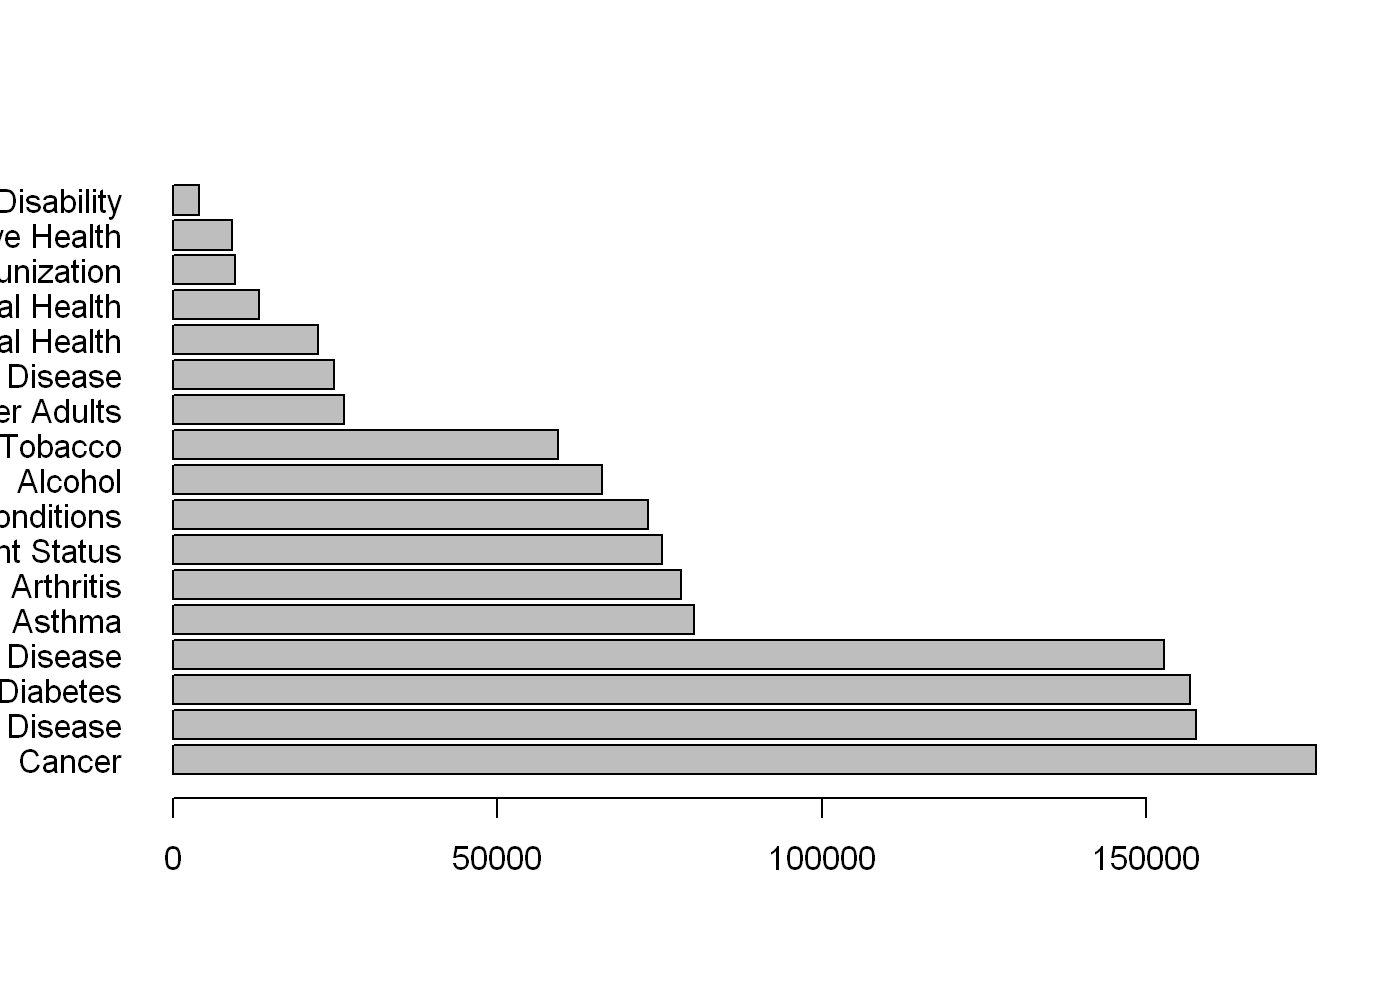

In [42]:
# settings for plot visualisation
options(repr.plot.height = 5, repr.plot.res = 200)


# TODO - create barplot from the previously sorted table (default = vertical)
#barplot(table1)
# TODO - set the labels' orientation to perpendicular (find 'las' attribute in the advanced formatting link)

# increase margin size to fit
#par(mar=c(20,5,1,1)) # vertical

# TODO - change the barplot to horizontal (find 'horiz' attribute in the advanced formatting link)
barplot(table1, horiz = TRUE, las = 1 )
# par(mar=c(5,20,1,1)) # horizontal


   
##### B. Numerické premenné

10. Zobrazenie matematických vlastností
    
    - variancia (variance): priemerná kvadratická odchýlka od priemeru
    - smerodajná odchýlka (standard deviation): druhá odmocnina variancie
    - horný/dolný kvartil (quartile): hodnota, od ktorej je 25%, resp. 75% hodnôt menších
    - medián (median) - rozdeľuje súbor údajov na dve rovnaké polovice (polovica údajov je pred ním, polovica za ním)
    - priemer (mean) - súčet všetkých hodnôt delený počtom hodnôt, ovplyvnený extrémnymi hodnotami
    - NA - prázdne hodnoty

Možnosť použiť ďalšie funkcie ako sd(), var(), boxplot.stats() a pod.

In [43]:
# summary shows min, max, 1.st and 3.rd Quartile, Median, Mean and NA's
summary(data$DataValueAlt)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
      0.0      16.1      40.0    1005.3      76.0 2925456.0    381098 

11. Zobrazenie chýbajúcich hodnôt v datasete
    - chýbajúce hodnoty - NA - www.rdocumentation.org/packages/base/versions/3.6.2/topics/NA

In [44]:
# see data in variable
data$LowConfidenceLimit

# is.na - function that returns logical value, whether the value is NA or not
is.na(data$LowConfidenceLimit)

[1]      NA   24.90   17.00   10.40      NA   53.90   52.30   54.20   58.50
   [10]      NA   34.70   56.30   63.80      NA   66.50   66.80   19.50      NA
   [19]      NA      NA      NA      NA      NA      NA   27.90   13.60   18.90
   [28]      NA      NA      NA      NA      NA      NA   12.50      NA    6.70
   [37]      NA      NA    9.20      NA      NA      NA      NA      NA   10.50
   [46]      NA      NA      NA      NA      NA      NA      NA      NA      NA
   [55]      NA    7.80      NA      NA      NA      NA      NA      NA      NA
   [64]   13.70      NA      NA   13.60      NA      NA      NA      NA      NA
   [73]      NA      NA      NA      NA      NA   16.10      NA      NA      NA
   [82]      NA      NA      NA   16.50      NA      NA      NA      NA      NA
   [91]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [100]      NA      NA   28.00      NA      NA  109.40    7.20   28.90      NA
  [109]      NA      NA      NA      NA      NA      NA      NA      NA    6.90
  [118]      NA      NA      NA      NA   34.15      NA      NA      NA      NA
  [127]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [136]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [145]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [154]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [163]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [172]      NA      NA      NA   10.50      NA      NA      NA      NA      NA
  [181]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [190]      NA    8.50      NA      NA      NA      NA      NA      NA      NA
  [199]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [208]      NA      NA      NA    6.50      NA      NA      NA      NA      NA
  [217]    6.40      NA      NA    7.00      NA      NA      NA      NA      NA
  [226]    6.60      NA      NA      NA   12.90      NA      NA    9.40      NA
  [235]      NA      NA      NA      NA    8.30      NA      NA      NA      NA
  [244]      NA      NA      NA   10.60      NA      NA      NA      NA      NA
  [253]      NA      NA      NA    8.00    8.90    7.00      NA    7.20      NA
  [262]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [271]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [280]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [289]      NA      NA    1.80      NA      NA      NA      NA      NA      NA
  [298]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [307]      NA      NA      NA  129.30      NA  115.60      NA      NA      NA
  [316]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [325]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [334]      NA      NA      NA      NA      NA      NA      NA    6.80      NA
  [343]    2.80      NA      NA      NA      NA   19.00   18.70      NA      NA
  [352]      NA      NA      NA      NA   21.20   20.50   21.00   22.00   23.10
  [361]      NA      NA      NA   19.10      NA      NA      NA      NA      NA
  [370]      NA      NA   17.70   19.20      NA      NA      NA      NA      NA
  [379]      NA      NA      NA      NA      NA      NA      NA      NA  515.30
  [388]      NA      NA  636.60      NA      NA      NA  599.50      NA      NA
  [397]      NA      NA      NA      NA      NA  515.30      NA      NA      NA
  [406]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [415]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [424]      NA      NA      NA      NA      NA      NA      NA      NA  606.60
  [433]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [442]      NA      NA      NA      NA      NA      NA      NA      NA      NA
  [4

[1]  TRUE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE
   [13] FALSE  TRUE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [25] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
   [37]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
   [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
   [61]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
   [73]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [85] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
   [97]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE  TRUE
  [109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE
  [121]  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [145]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [157]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [169]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
  [181]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
  [193]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [205]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
  [217] FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
  [229]  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
  [241]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
  [253]  TRUE  TRUE  TRUE FALSE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
  [265]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [277]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [289]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [301]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE
  [313]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [325]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [337]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE FALSE
  [349] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE
  [361]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
  [373] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [385]  TRUE  TRUE FALSE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
  [397]  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [409]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [421]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
  [433]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [445]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
  [457]  TRUE  TRUE  TRUE  TRUE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE
  [469] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [481]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
  [493]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE
  [505]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [517]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE
  [529] FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [541]  TRUE  TRUE  TRUE FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
  [553] FALSE FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE
  [565]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [577] FALSE FALSE  TRUE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE
  [589]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
  [6

In [45]:
# display all the variables of all the data, where LowConfidenceLimit is NA
data[is.na(data$LowConfidenceLimit),] 

YearStart YearEnd LocationAbbr LocationDesc         DataSource
1       2010      2010    OR           Oregon               NVSS      
5       2015      2015    VI           Virgin Islands       YRBSS     
10      2013      2013    MS           Mississippi          PRAMS     
14      2011      2011    US           United States        PRAMS     
18      2011      2011    AK           Alaska               NVSS      
19      2016      2016    AK           Alaska               NVSS      
20      2019      2019    AK           Alaska               NVSS      
21      2016      2016    AL           Alabama              NVSS      
22      2012      2012    AR           Arkansas             NVSS      
23      2019      2019    AR           Arkansas             NVSS      
24      2018      2018    AZ           Arizona              NVSS      
28      2014      2014    CT           Connecticut          NVSS      
29      2020      2020    DC           District of Columbia NVSS      
30      2015      2015    DC           District of Columbia NVSS      
31      2017      2017    DC           District of Columbia NVSS      
32      2010      2010    DE           Delaware             NVSS      
33      2016      2016    DE           Delaware             NVSS      
35      2012      2012    FL           Florida              NVSS      
37      2011      2011    HI           Hawaii               NVSS      
38      2010      2010    IA           Iowa                 NVSS      
40      2017      2017    IA           Iowa                 NVSS      
41      2014      2014    ID           Idaho                NVSS      
42      2015      2015    ID           Idaho                NVSS      
43      2010      2010    IN           Indiana              NVSS      
44      2020      2020    KS           Kansas               NVSS      
46      2012      2012    KY           Kentucky             NVSS      
47      2011      2011    LA           Louisiana            NVSS      
48      2015      2015    LA           Louisiana            NVSS      
49      2010      2010    MA           Massachusetts        NVSS      
50      2011      2011    MA           Massachusetts        NVSS      
⋮       ⋮         ⋮       ⋮            ⋮                    ⋮         
1185590 2016      2016    WY           Wyoming              BRFSS     
1185591 2012      2012    WY           Wyoming              BRFSS     
1185592 2017      2017    MT           Montana              BRFSS     
1185598 2019      2019    TN           Tennessee            BRFSS     
1185599 2017      2017    WY           Wyoming              BRFSS     
1185600 2016      2016    WY           Wyoming              BRFSS     
1185601 2020      2020    WY           Wyoming              BRFSS     
1185603 2020      2020    WY           Wyoming              BRFSS     
1185608 2017      2017    DC           District of Columbia BRFSS     
1185615 2020      2020    WY           Wyoming              BRFSS     
1185616 2017      2017    VI           Virgin Islands       BRFSS     
1185620 2017      2017    TN           Tennessee            BRFSS     
1185628 2017      2017    AL           Alabama              BRFSS     
1185629 2020      2020    WY           Wyoming              BRFSS     
1185631 2020      2020    WY           Wyoming              BRFSS     
1185632 2020      2020    WY           Wyoming              BRFSS     
1185638 2020      2020    WY           Wyoming              BRFSS     
1185641 2019      2019    VT           Vermont              BRFSS     
1185643 2017      2017    SD           South Dakota         BRFSS     
1185646 2020      2020    WY           Wyoming              BRFSS     
1185647 2017      2017    VI           Virgin Islands       BRFSS     
1185649 2020      2020    WY           Wyoming              BRFSS     
1185656 2019      2019    AK           Alaska               BRFSS     
1185657 2019      2019    VT           Vermont              BRFSS     
1185663 2020      2020    WY    

## Očistenie (clean)

Očistenie údajov zahŕňa: 
- overenie/úpravu typov premenných
- výber podstatných premenných
- filtrovanie hodnôt, podľa toho čo chceme ďalej spracovávať
- odstránenie NA a duplicitných údajov

1. Overenie a zmena typu premennej
    - pri kategorických premenných je dobré zmeniť typ premennej z 'character' na 'factor', pretože pri niektorých štatistických testoch (napr. ANOVA) sa môže stať, že  táto premenná nebude vyhodnocovaná ako kateogrická, čo ovplyvní typ a výsledok použitého testu
  
    - as.factor - www.rdocumentation.org/packages/h2o/versions/3.42.0.2/topics/as.factor


In [48]:
# class function shows the variable type
class(data$Topic)

[1] "factor"

In [47]:
# change categorical variable types to factor
data$LocationAbbr <- as.factor(data$LocationAbbr)
data$LocationDesc <- as.factor(data$LocationDesc)
data$DataSource <- as.factor(data$DataSource)
data$Topic <- as.factor(data$Topic)
data$TopicID <- as.factor(data$TopicID)
data$Question <- as.factor(data$Question)
data$QuestionID <- as.factor(data$QuestionID)
data$StratificationCategory1 <- as.factor(data$StratificationCategory1)
data$DataValueType <- as.factor(data$DataValueType)

2. Overenie hodnôt premennej (špecifické pre premenné typu factor)

   - rozdiel unique/factor - unique vracia unikátne hodnoty prítomné vo vzorke, factor vracia všetky hodnoty, ktoré má premenná definované a môže ich nadobúdať (niečo ako výber hodnoty z dropdownu)

In [51]:

levels(data$StratificationCategory1)

[1] "Gender"         "Overall"        "Race/Ethnicity"

3. Výber podstatných premenných

   - redukcia datasetu - len premenné ktoré nás zaujímajú/majú pre nás nejakú hodnotu
   - funkcia select - https://dplyr.tidyverse.org/reference/select.html
   - pre opakujúce sa názvy použite funkciu starts_with - https://www.rdocumentation.org/packages/tidyselect/versions/1.2.0/topics/starts_with

**Ktoré premenné na základe doterajších znalostí môžeme vynechať?**

In [52]:
# %>% in R means redirecting the output to some function, similar to >> in bash
 #TODO
data %>% 
    select(YearStart, YearEnd, starts_with("Location"), DataSource, TopicID, Topic, QuestionID, Question, starts_with("DataValue"), LowConfidenceLimit,
           HighConfidenceLimit, StratificationCategoryID1, StratificationID1, StratificationCategory1, Stratification1,
           -DatavalueFootnote, -DataValueFootnoteSymbol)

YearStart YearEnd LocationAbbr LocationDesc         LocationID
1       2010      2010    OR           Oregon               41        
2       2019      2019    AZ           Arizona               4        
3       2019      2019    OH           Ohio                 39        
4       2019      2019    US           United States        59        
5       2015      2015    VI           Virgin Islands       78        
6       2020      2020    AL           Alabama               1        
7       2015      2015    DE           Delaware             10        
8       2019      2019    FL           Florida              12        
9       2018      2018    KS           Kansas               20        
10      2013      2013    MS           Mississippi          28        
11      2015      2015    NJ           New Jersey           34        
12      2020      2020    PA           Pennsylvania         42        
13      2018      2018    SD           South Dakota         46        
14      2011      2011    US           United States        59        
15      2018      2018    US           United States        59        
16      2012      2012    VT           Vermont              50        
17      2013      2013    NJ           New Jersey           34        
18      2011      2011    AK           Alaska                2        
19      2016      2016    AK           Alaska                2        
20      2019      2019    AK           Alaska                2        
21      2016      2016    AL           Alabama               1        
22      2012      2012    AR           Arkansas              5        
23      2019      2019    AR           Arkansas              5        
24      2018      2018    AZ           Arizona               4        
25      2020      2020    CO           Colorado              8        
26      2018      2018    CO           Colorado              8        
27      2019      2019    CO           Colorado              8        
28      2014      2014    CT           Connecticut           9        
29      2020      2020    DC           District of Columbia 11        
30      2015      2015    DC           District of Columbia 11        
⋮       ⋮         ⋮       ⋮            ⋮                    ⋮         
1185647 2017      2017    VI           Virgin Islands       78        
1185648 2017      2017    MI           Michigan             26        
1185649 2020      2020    WY           Wyoming              56        
1185650 2017      2017    AK           Alaska                2        
1185651 2019      2019    GU           Guam                 66        
1185652 2019      2019    MA           Massachusetts        25        
1185653 2018      2018    WY           Wyoming              56        
1185654 2017      2017    MA           Massachusetts        25        
1185655 2020      2020    WY           Wyoming              56        
1185656 2019      2019    AK           Alaska                2        
1185657 2019      2019    VT           Vermont              50        
1185658 2017      2017    NJ           New Jersey           34        
1185659 2020      2020    WY           Wyoming              56        
1185660 2020      2020    WY           Wyoming              56        
1185661 2020      2020    WY           Wyoming              56        
1185662 2018      2018    WY           Wyoming              56        
1185663 2020      2020    WY           Wyoming              56        
1185664 2018      2018    WY           Wyoming              56        
1185665 2019      2019    ID           Idaho                16        
1185666 2019      2019    VA           Virginia             51        
1185667 2017      2017    VT           Vermont              50        
1185668 2020      2020    WY           Wyoming              56        
1185669 2019      2019    ME           Maine                23        
1185670 2019      2019    WY           Wyoming              56        
1185671 2019      2019    OK    

V premennej DataValueUnit sa v niektorých záznamoch nachádzajú prázdne hodnoty. 

**Malo by význam ich vyfiltrovať ?** 

Ak áno tak kedy ?

4. Výber záznamov s ktorými chceme pracovať

   - napríklad chceme pracovať len s otázkami ktoré sa týkajú cukrovky (TopicID = 'DIA') a boli zaznamenané od roku 2015.
   - doplňte predošlý výber údajov o filtrovanie tak, že výstup z funkcie select presmerujete do ďalšej funkcie, kde vyfiltrujete údaje
   - použite funkciu filter - https://dplyr.tidyverse.org/articles/grouping.html?q=filter#filter
   - pre porovnávanie faktorov/stringov môžete použiť %in% operator - NázovPremennej %in% "HodnotaPremennej"
   - operátory v R - https://www.statmethods.net/management/operators.html
   - priraďte output do premennej `data_chosen`

In [57]:
# TODO
# use function filter(condition1 & condition2)
data_chosen <- data %>% 
    select(YearStart, YearEnd, starts_with("Location"), DataSource, TopicID, Topic, QuestionID, Question, starts_with("DataValue"), LowConfidenceLimit,
           HighConfidenceLimit, StratificationCategoryID1, StratificationID1, StratificationCategory1, Stratification1,
           -DatavalueFootnote, -DataValueFootnoteSymbol)
    #%>% filter(TopicID == "DIA" & YearStart == 2005)

5. Odstránenie chýbajúcich hodnôt

    - dôležité najmä pre numerické premenné - použitie matematických funkcií 

In [58]:
# numeric variable with non-numeric datatype
mean(data_chosen$DataValue)

Warning message in mean.default(data_chosen$DataValue):
"argument is not numeric or logical: returning NA"


[1] NA

In [ ]:
# numeric variable with numeric datatype but also NA's
mean(data_chosen$DataValueAlt)

In [ ]:
# numeric variable with numeric datatype but also NA's
mean(data_chosen$DataValueAlt, na.rm = TRUE)

6. Zobrazenie nekompletných záznamov

In [ ]:
# the dot passes the input of the filter function as an input to the complete.cases function
data_chosen %>% 
    filter(!complete.cases(.))

Vymazanie záznamov, ktoré majú v stĺpci DataValueAlt hodnotu NA

In [ ]:
data_filtered <- data_chosen %>% 
    drop_na(DataValueAlt)

data_filtered

Overenie, či dataset obsahuje ešte nejaké NA hodnoty:

In [59]:
# TODO
summary(data_filtered)

ERROR: Error in eval(expr, envir, enclos): object 'data_filtered' not found


7. Odstránenie duplicitných hodnôt
    
    - funkcia distinct - https://www.rdocumentation.org/packages/dplyr/versions/1.0.10/topics/distinct

In [ ]:
data_clean <- data_filtered %>% 
    distinct()

## Úpravy (mutate)

- ak z nejakých dôvodov potrebujeme urobiť zmeny premenných
    - prekódovanie premennej
    - zmena názvu premennej
    - vytvorenie pivotovej tabuľky a pod.

1. Prekódovanie hodnôt

   - napr. ak chceme niektorú z kategorických premenných označiť číselným kódovaním, prípadne zmeniť ich poradie, atď.

In [62]:
unique(data_clean$Stratification1)
unique(data_clean$StratificationID1)

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: unique(data_clean$Stratification1)
2: unique(data_clean$StratificationID1$
  ^


Aký dátový typ má premenná `Stratification1` ?

In [63]:
# TODO
class(data$Stratification1)

[1] "character"

Aky typ musí mať aby bola kategorická?

Zmeňte typ premennej `StratificationID1` na kategorický a nastavte poradie hodnôt v tejto premennej.

- Použite funkciu factor - https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/factor

In [ ]:
# TODO
# variable <- factor(variable, levels = c( ... (values) )

Vytvorte v datasete `data_clean` novú premennú s názvom `Stratification1ID_code`, ktorá bude obsahovať zakódované hodnoty premennej  `Stratification1ID` vo forme celých čísel.
- Použite funkciu as.integer - https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/integer

In [ ]:
# TODO

2. Zmena názvu premennej
- funkcia rename - https://dplyr.tidyverse.org/reference/rename.html

In [ ]:
data_clean <- data_clean %>%
    rename("DataValueNum" = "DataValueAlt")  # target = source

3. Vytvorenie kontingenčnej tabuľky (pivot table)

   - vzájomný vzťah dvoch premenných
   - stĺpce ukazujú hodnoty jednej premennej, riadky druhej premennej
   - hodnoty v tabuľke ukazujú agregované hodnoty - počet, maximum, minimum, priemer, ..
  
Na vytvorenie sa môže použiť funkcia pivot_wider alebo pivot_longer

In [ ]:
# select specific data for pivot table only
data_pivot <- select(data_clean, YearStart, LocationAbbr, DataValueNum) 

# pivot table in wider format where columns are YearStart values, 
# rows are LocationAbbr and values are the mean of DataValueAlt
pivot_table <- data_pivot %>%
    pivot_wider(names_from = YearStart, 
                values_from = DataValueNum, 
                values_fn = list(DataValueNum = mean))

pivot_table

## Popis (describe)

- popis intervalu, v ktorom sa údaje nachádzajú
- ich sústredenie (centralizovanie) okolo stredu
- rozptyl
- sumarizácia
- vytvorenie tabuliek

1. Popis matematických vlastností

In [ ]:
min(data_clean$DataValueNum)
max(data_clean$DataValueNum)

# min - max
range(data_clean$DataValueNum)

# interquartile range
IQR(data_clean$DataValueNum)

mean(data_clean$DataValueNum, na.rm = TRUE)
median(data_clean$DataValueNum)

var(data_clean$DataValueNum)

2. Vytvorenie tabuľky s použitím sumarizácie

   - zoskupovanie údajov - funkcia group_by - https://dplyr.tidyverse.org/reference/group_by.html
   - funkcia summarise - https://dplyr.tidyverse.org/reference/summarise.html

In [ ]:
data_clean %>%
    group_by(LocationAbbr) %>%
    summarise(MinValue = min(DataValueNum), 
              MaxValue = max(DataValueNum), 
              Mean = mean(DataValueNum),
              SD = sd(DataValueNum))

## Vizualizácia (vizualize)

- grafy pre jednoduché pochopenie údajov
- oddelenie kategorickej závislej premennej v priestore nezávislých premenných
    - napr. farebné oddelenie chorých/zdravých pacientov v grafe priemerných hodnôt krvného tlaku a veku
 
+ najpoužívanejšia knižnica - ggplot2 - https://ggplot2.tidyverse.org/

1. Stĺpcový graf Výskytu cukrovky podľa lokality

In [66]:
ggplot(data_clean, aes(x = LocationAbbr, y = DataValueNum)) +
  geom_col() +
  theme(axis.text.x = element_text(angle = 90)) +
  labs(title = "Prevalence of Diabetes by Location", y = "Prevalence (%)", x = "Location")

ERROR: Error in eval(expr, envir, enclos): object 'data_clean' not found


6. Boxplot diagram

   - čiara - medián
   - box - medzikvartilové rozpätie - obsahuje 50% hodnôt
   - hranice - minimum, maximum
  
<img src="data/boxplot.png " alt="Workflow diagram" width="70%"/>

Pozorovania:

- Medián zaočkovanosti je vo všetkých skupinách v intervale 40-60 %.
- Medzikvartilové rozpätie (IQR - box) je vo väčšine skupín podobné, čo naznačuje konzistentné rozloženie údajov okolo mediánu.
- Najmenšia vaeriabilita je v skupine "Multiracial, non-Hispanic".
- V niekoľkých skupinách sa vyskytujú odľahlé hodnoty, najmä v skupinách "Black, non-Hispanic, Male a Overall", čo poukazuje na niektoré osoby s výrazne nižšou mierou zaočkovanosti.

## Analýza (analyze)


- Odhalenie závislostí (napr. korelácia)
- Štatistické testy
- Algoritmy (dimenzionálna redukcia, strojové učenie, ...)

Dataset Breast Cancer Wisconsin (Original)

- dostupný na https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original

- premenné:
    - Sample_code_number (ID),
    - Clump_thickness - hrúbka zhluku
    - Uniformity_of_cell_size - Uniformita veľkosti buniek
    - Uniformity_of_cell_shape - uniformita tvaru buniek
    - Marginal_adhesion - Priľnavosť okrajov
    - Single_epithelial_cell_size - veľkosť jednej epitelovej bunky
    - Bare_nuclei - "holé" jadrá (bez cytoplazmy)
    - Bland_chromatin - nevýrazný chromatín
    - Normal_nucleoli - normálne jadrá
    - Mitoses - mitózy
    - Class - typ nádoru (4 Malígny, 2 Benígny)

In [67]:
# load the dataset
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

# change the variable names
data_bc <- read.csv(file = url, header = FALSE,
                col.names = c("id","CT", "UCSize", "UCShape", "MA", "SECS", "BN", "BC", "NN","M", "diagnosis"))
head(data_bc)

# mutate the diagnosis variable
data_bc$diagnosis[data_bc$diagnosis==4] = 1 # malign
data_bc$diagnosis[data_bc$diagnosis==2] = 0 # benign

#filter to check and review any duplicate records
data_bc <- data_bc %>% 
    distinct()

# select only relevant variables
data_bc <- data_bc %>% select(-id, -BN)

head(data_bc)


id      CT UCSize UCShape MA SECS BN BC NN M diagnosis
1 1000025 5   1      1      1  2    1  3  1  1 2        
2 1002945 5   4      4      5  7    10 3  2  1 2        
3 1015425 3   1      1      1  2    2  3  1  1 2        
4 1016277 6   8      8      1  3    4  3  7  1 2        
5 1017023 4   1      1      3  2    1  3  1  1 2        
6 1017122 8  10     10      8  7    10 9  7  1 4

CT UCSize UCShape MA SECS BC NN M diagnosis
1 5   1      1      1  2    3  1  1 0        
2 5   4      4      5  7    3  2  1 0        
3 3   1      1      1  2    3  1  1 0        
4 6   8      8      1  3    3  7  1 0        
5 4   1      1      3  2    3  1  1 0        
6 8  10     10      8  7    9  7  1 1

1. Vzťahy medzi premennými

   - premenné sa môžu navzájom ovplyvňovať
   - lineárne alebo nelineárne vzťahy
   - vizualizácia pre jednoduché pochopenie, či je možné pomocou vybraných premenných jednoznačne oddeliť hodnoty závislej premennej (v tomto prípade benígne a malígne nádory)

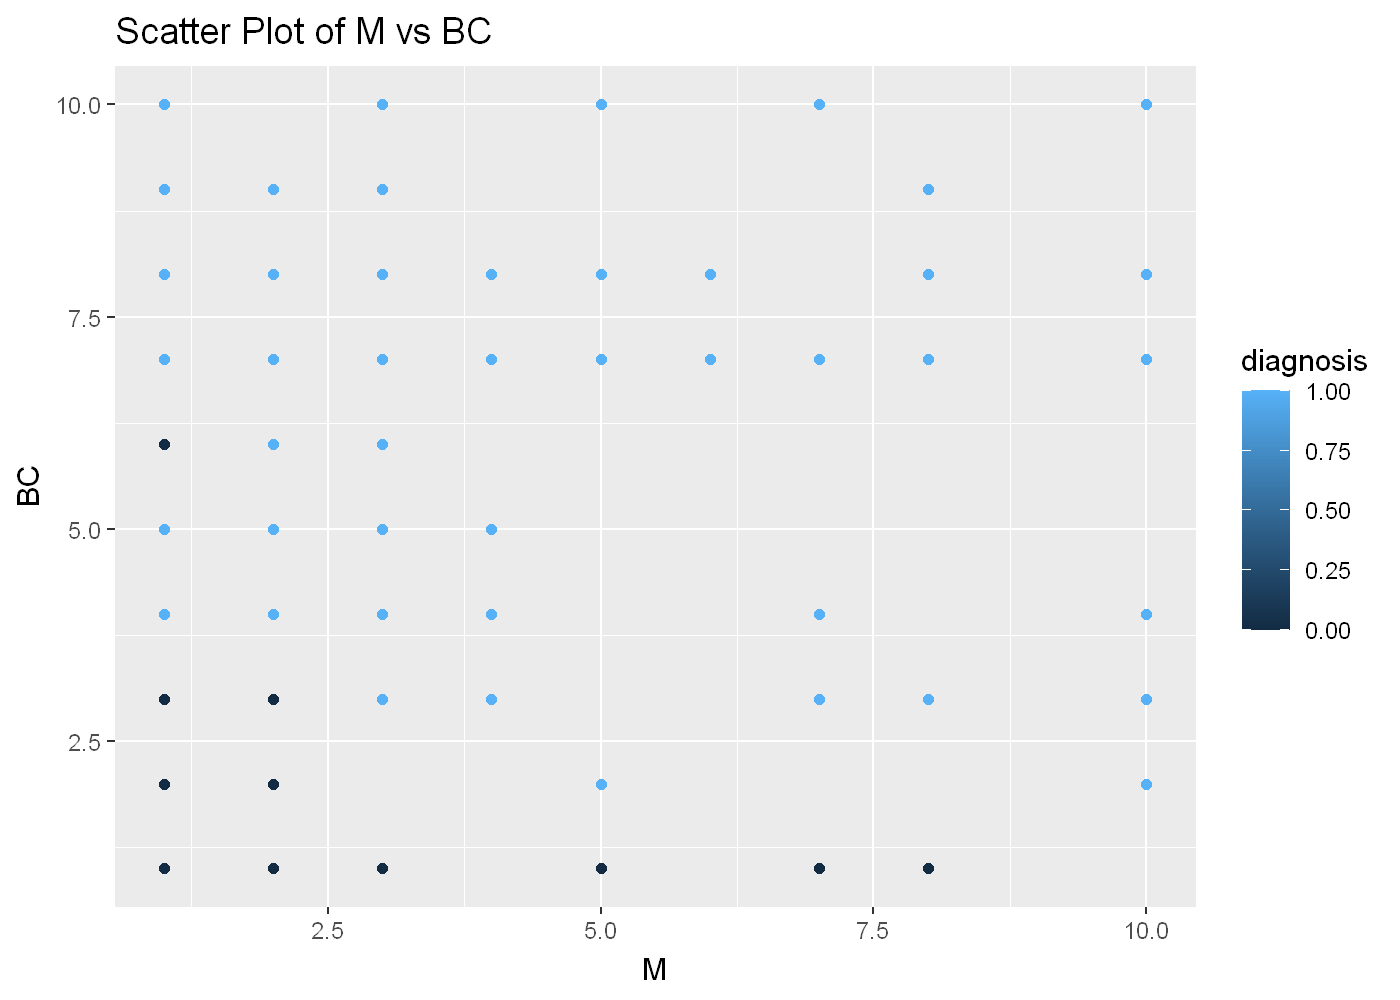

In [68]:
ggplot(data_bc, aes(x = M, y = BC, color = diagnosis)) +
  geom_point() +
  ggtitle("Scatter Plot of M vs BC")

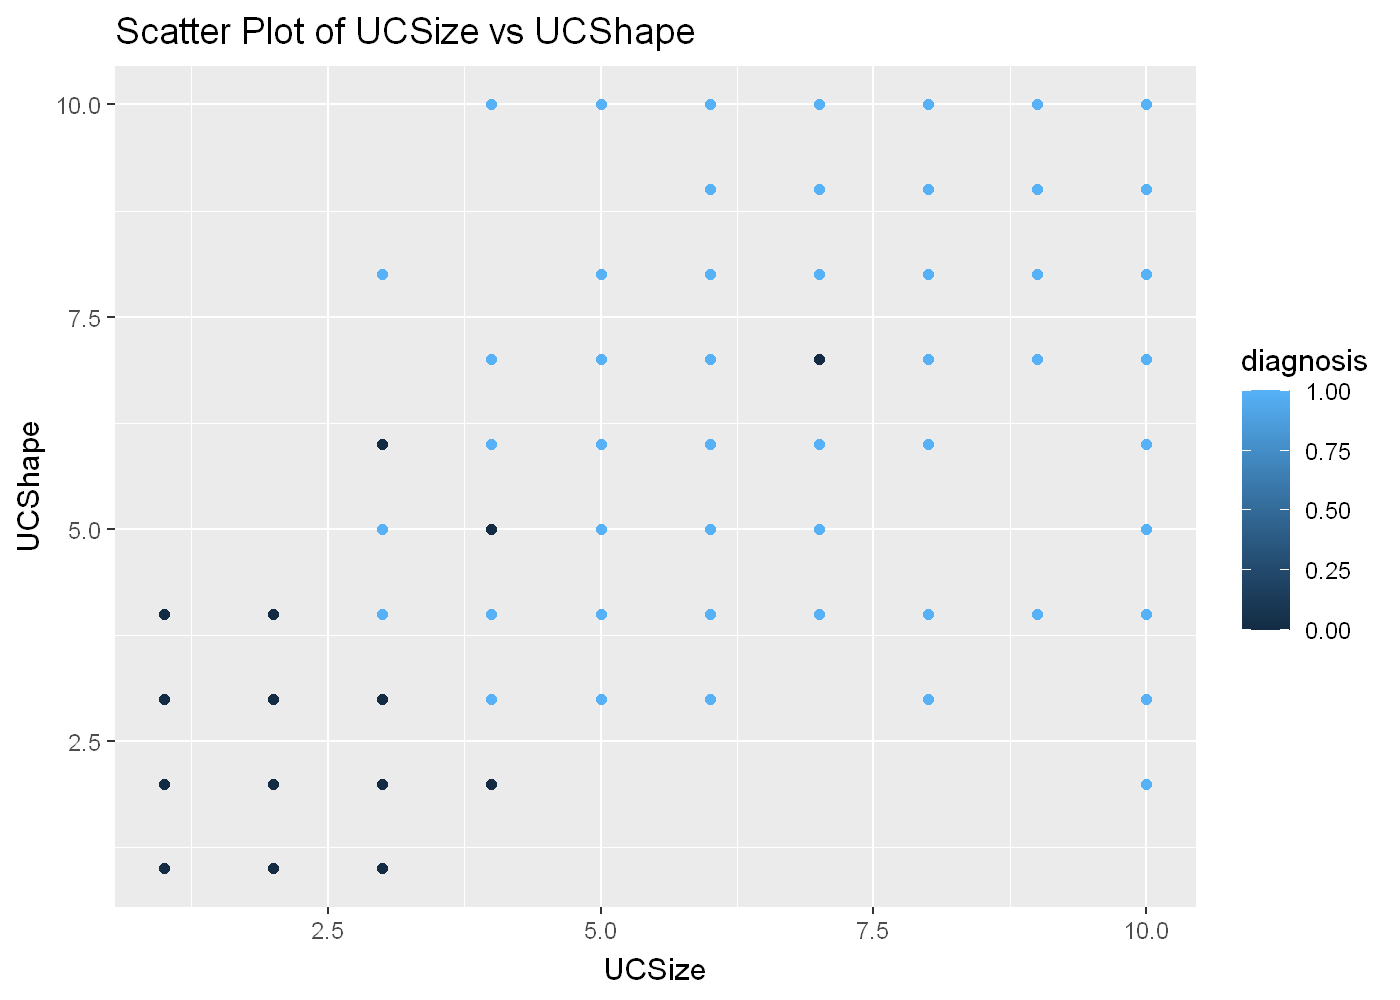

In [69]:
ggplot(data_bc, aes(x = UCSize, y = UCShape, color = diagnosis)) +
  geom_point() +
  ggtitle("Scatter Plot of UCSize vs UCShape")

2. Korelácia premenných

    - V intervale <-1, 1> 
    - pozitívna (1) - so zvyšovaním jednej premennej sa zvyšuje aj druhá
    - negatívna (-1) - so zvyšovaním jednej premennej sa druhá premenná znižuje
    - nulová (0) - premenné sa neovplyvňujú


   Korelácia neznamená kauzalitu - dva javy sa môžu ukazovať ako závislé, ale neznamená to, že jeden spôsobuje vznik druhého.

In [5]:
library(corrplot)

# create a correlation matrix
data_bc_matrix <- cor(data_bc)

# create a correlation plot
corrplot(data_bc_matrix, order="hclust", type='upper',tl.srt = 45, tl.cex = 0.6)

corrplot 0.92 loaded



ERROR: Error in eval(expr, envir, enclos): object 'data_bc' not found
